## Potential of Defaulting a loan by a customer
### gyleodhis@outlook.com
### Data Source: [Kaggle](https://www.kaggle.com/c/santander-customer-transaction-prediction)

### [@gyleodhis](https://www.twitter.com/gyleodhis)
### ![Gyle](./static/gyle.jpg)
#### Licence:
You can use this code for anything you may wish only leave this page:
 - __AS IS; HOW IS, WHERE IS__

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("./static/"))
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

# Any results you write to the current directory are saved as output.

['test_bqCt9Pv.csv', 'gyle.jpg', 'train.csv', 'sample_submission_24jSKY6.csv']


In [2]:
# reading the data

train = pd.read_csv('./static//train.csv')
test = pd.read_csv('./static//test_bqCt9Pv.csv')

# getting the shapes of the datasets
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)

Shape of Train : (233154, 41)
Shape of Test : (112392, 40)


In [3]:
# lets look at the head of the train

train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


### lets look at a sample of the test data

In [4]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


### The Training Set

In [5]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


### Statistical Description of the Testing Data

In [6]:
test.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,...,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,...,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,...,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,...,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [7]:
# get the info of train

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

### Training Set Information

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

### Data types of Training Set

In [9]:
train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

### Testing Set Datatypes

In [10]:
test.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

### Checking for null values in the Training Set

In [11]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

### Checking for null values in the Testing Set

In [12]:
test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

#### Grouping customers according to type employment

In [13]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

### Filling Null values in the employment category
Employement Type has two types of Employment i.e., self employed and salaried but the empty values must be the people who don't  work at all that's why it is empty let's fill unemployed in the place of Null values.

In [14]:
train['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", train.isnull().sum())
print("Null values left in the test set:", test.isnull().sum())

Null values left in the train set: UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS     

In [15]:
# let's save the unique id of the test set and labels set

unique_id = test['UniqueID']
y_train = train.iloc[:, -1]

# let's delete the last column from the dataset to  concat train and test
train = train.drop(['loan_default'], axis = 1)

# shape of train
train.shape

(233154, 40)

### Merging the two datasets for visualizations.

In [16]:
# lets concat the train and test sets for preprocessing and visualizations

data = pd.concat([train, test], axis = 0)

# let's check the shape
data.shape

(345546, 40)

In [17]:
# let's check the employement type in the data

data['Employment.Type'].value_counts()

Self employed    187429
Salaried         147013
Unemployed        11104
Name: Employment.Type, dtype: int64

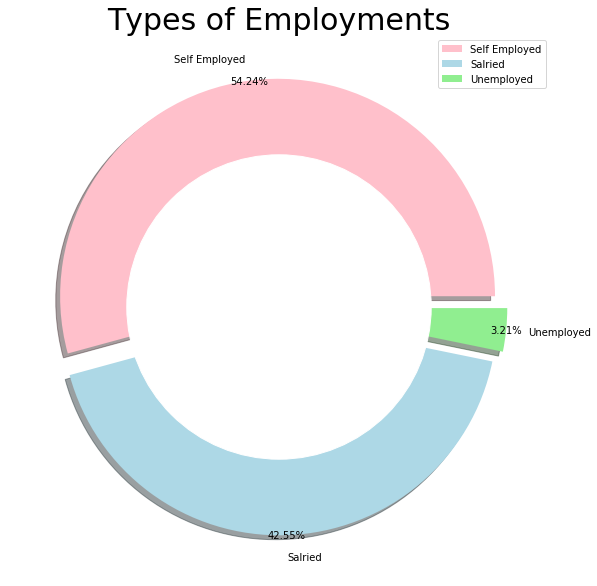

In [18]:
# plotting a donut chart

size = [187429, 147013, 11104]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

### Encodings for type of employments
We do this to convert the values from string to integers for easy working.

In [19]:
data['Employment.Type'] = data['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
data['Employment.Type'].value_counts()

2    187429
1    147013
0     11104
Name: Employment.Type, dtype: int64

In [20]:
# checking the columns names of the data

data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

### let's check the unique values of ids in different branchs

In [21]:
print("Total no. of Unique Ids :", data['UniqueID'].nunique())
print("Total no. of Unique Branches :", data['branch_id'].nunique())
print("Total no. of Unique Suppliers :", data['supplier_id'].nunique())
print("Total no. of Unique Manufactures :", data['manufacturer_id'].nunique())
print("Total no. of Unique Current pincode Ids :", data['Current_pincode_ID'].nunique())
print("Total no. of Unique State IDs :",data['State_ID'].nunique())
print("Total no. of Unique Employee code IDs :", data['Employee_code_ID'].nunique())

Total no. of Unique Ids : 345546
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 3089
Total no. of Unique Manufactures : 12
Total no. of Unique Current pincode Ids : 7096
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3398


### How is the disbursed amount distributed

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


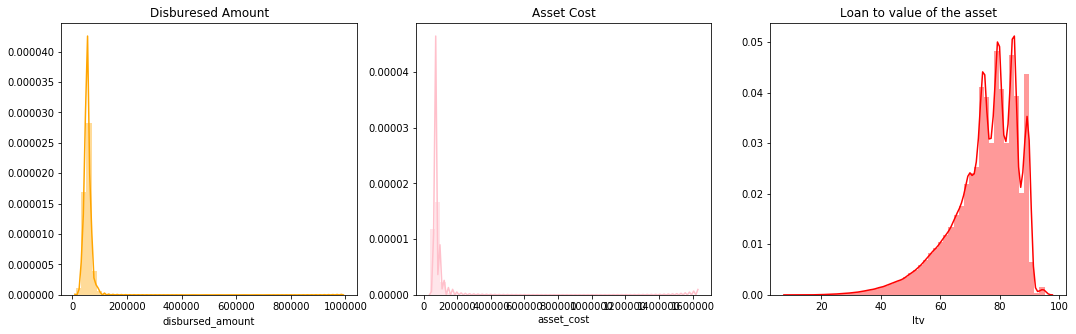

In [22]:
plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

### Let us do some log transformation on the above
This has no some real meaning but just for better transformation of our data.

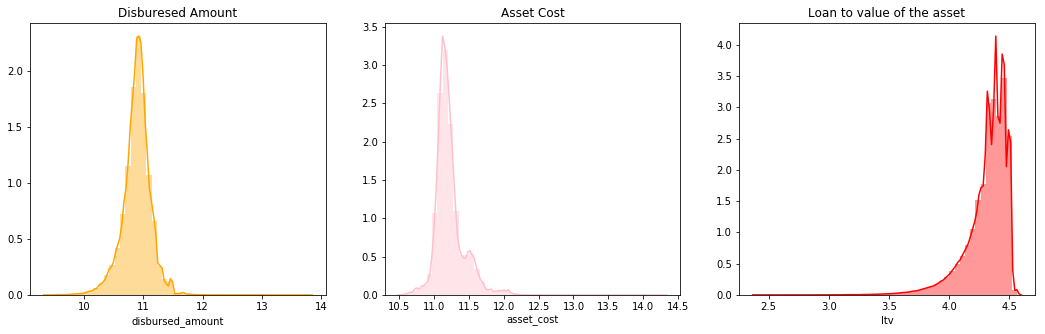

In [23]:
data['disbursed_amount'] = np.log1p(data['disbursed_amount'])
data['ltv'] = np.log1p(data['ltv'])
data['asset_cost'] = np.log1p(data['asset_cost'])


plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

### At what age were most of our customers born.

Text(0.5, 1.0, 'Distribution of Year of birth')

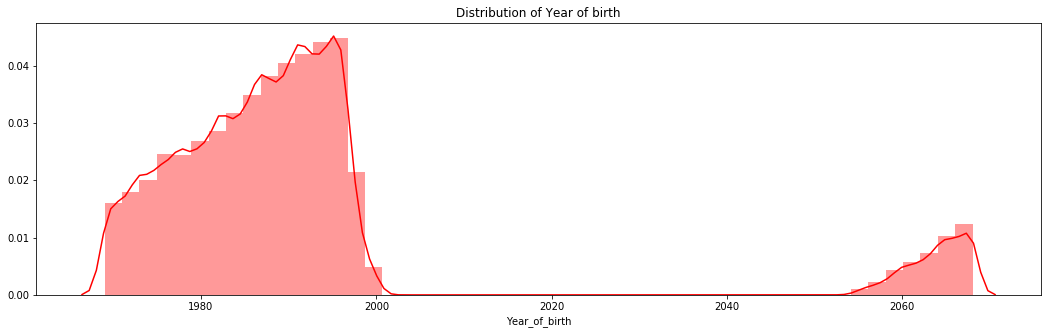

In [24]:
data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
data['Year_of_birth'] = data['Date.of.Birth'].dt.year

# checking the values inside date of year
sns.distplot(data['Year_of_birth'], color = 'red')
plt.title('Distribution of Year of birth')

### Number of Inquiries Made

Text(0.5, 1.0, 'No. of Inquiries')

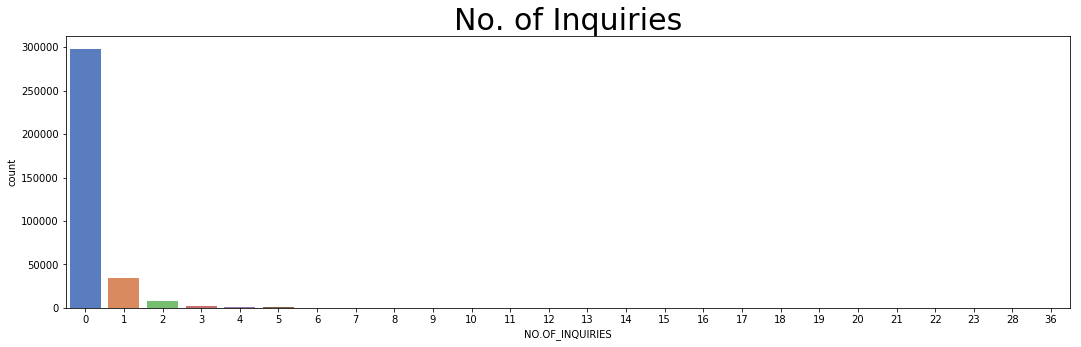

In [25]:
sns.countplot(data['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

### Credit History

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

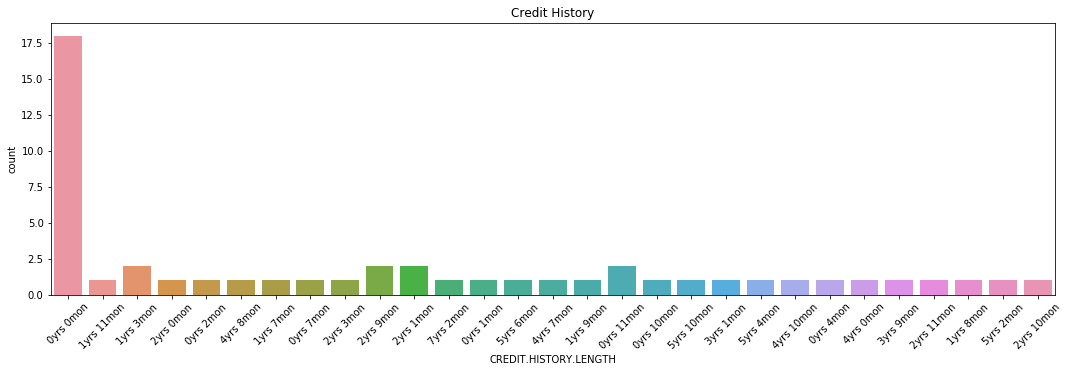

In [26]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

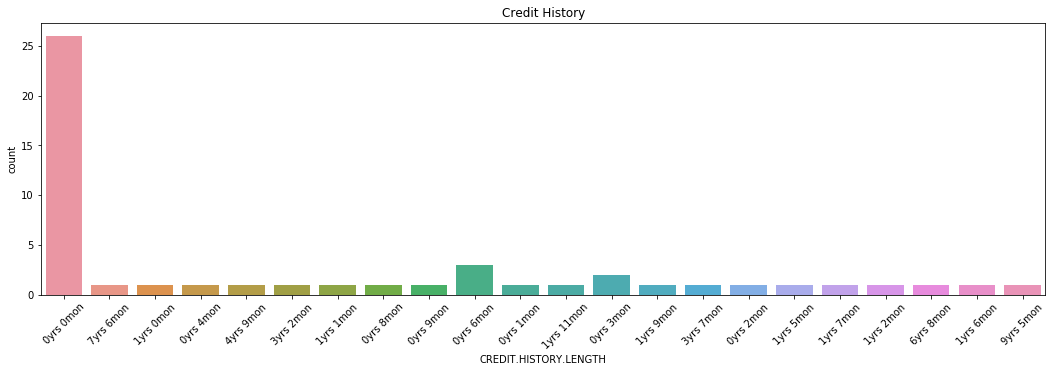

In [27]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].tail(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

In [28]:
# changing the credit history format from ayrsbmonths to years 
# as no. of years are more important

data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
#data['CREDIT.HISTORY.LENGTH'].value_counts()

### Credit history in Years

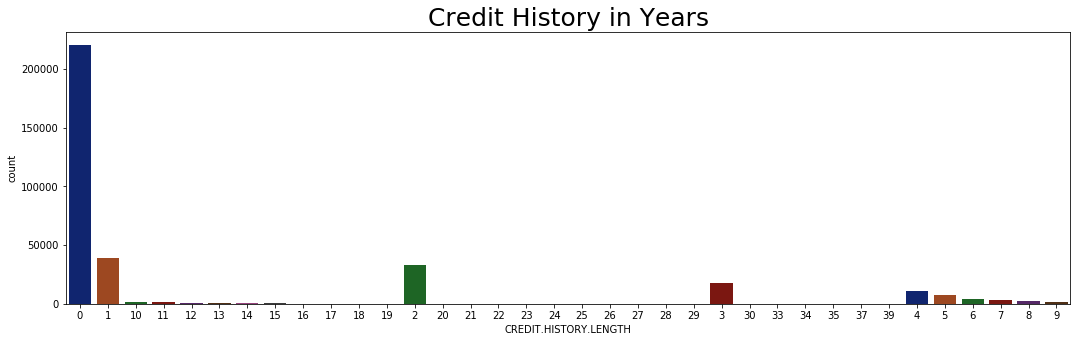

In [29]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'], palette = 'dark')
plt.title('Credit History in Years', fontsize = 25)
plt.show()

### Average Loan Tenure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

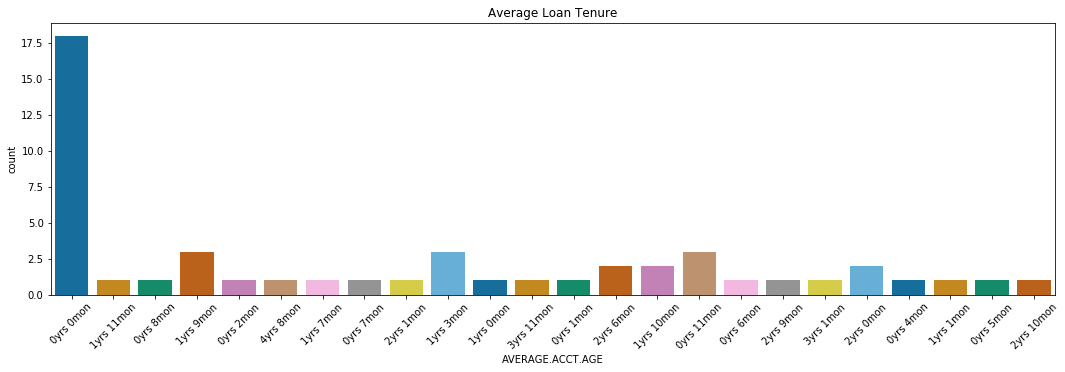

In [30]:
sns.countplot(data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)


In [31]:
# changing the average account age format from ayrsbmonths to years 
# as no. of years are more important

data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])
#data['AVERAGE.ACCT.AGE'].value_counts()

### Loans defaulted in the last six months

In [32]:
data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     319144
1      21684
2       3550
3        790
4        220
5         78
6         29
7         21
8         10
9          7
12         5
11         3
10         2
20         1
18         1
16         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

### New Loans in the last six months

In [33]:
data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     272341
1      45965
2      15618
3       6161
4       2636
5       1287
6        625
7        383
8        197
9        109
10        82
11        47
12        28
13        18
14        11
17         9
16         8
15         4
19         4
20         4
18         2
22         2
23         2
28         1
21         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

### Loan Characteristics by customers

(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,
         40000000.,  50000000.,  60000000.,  70000000.]),
 <a list of 9 Text xticklabel objects>)

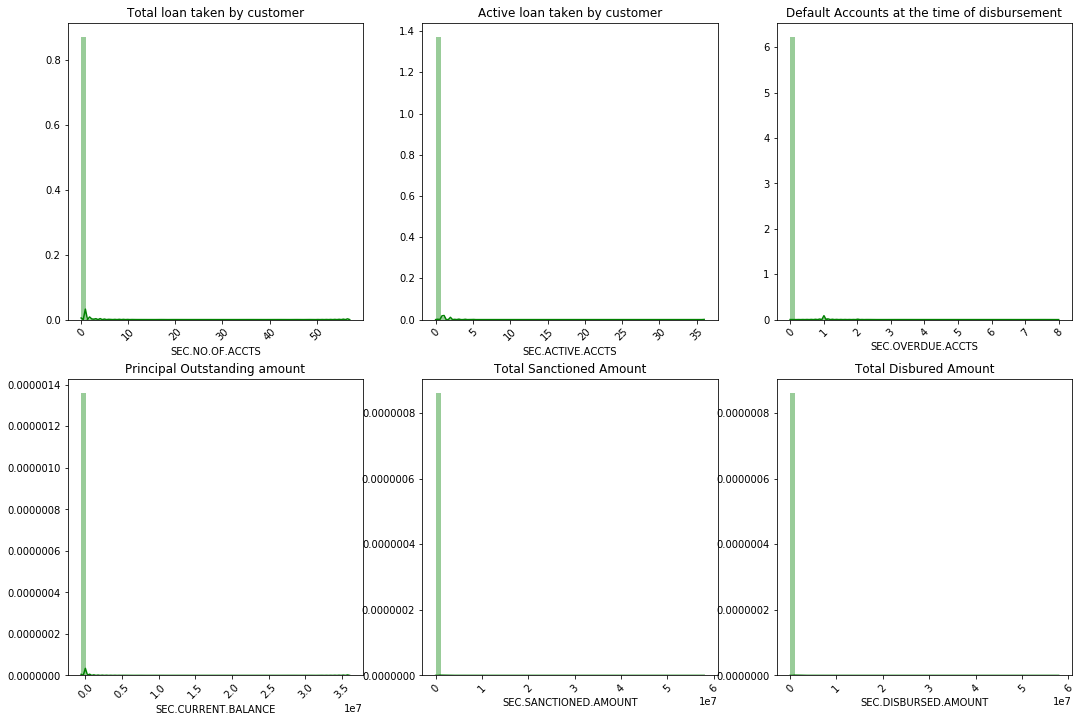

In [34]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'green')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'green')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'green')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'green')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

### Lets do some transformations to the above figures.

In [35]:
data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
#data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
data['SEC.SANCTIONED.AMOUNT'] = np.log1p(data['SEC.SANCTIONED.AMOUNT'])
data['SEC.DISBURSED.AMOUNT'] = np.log1p(data['SEC.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)

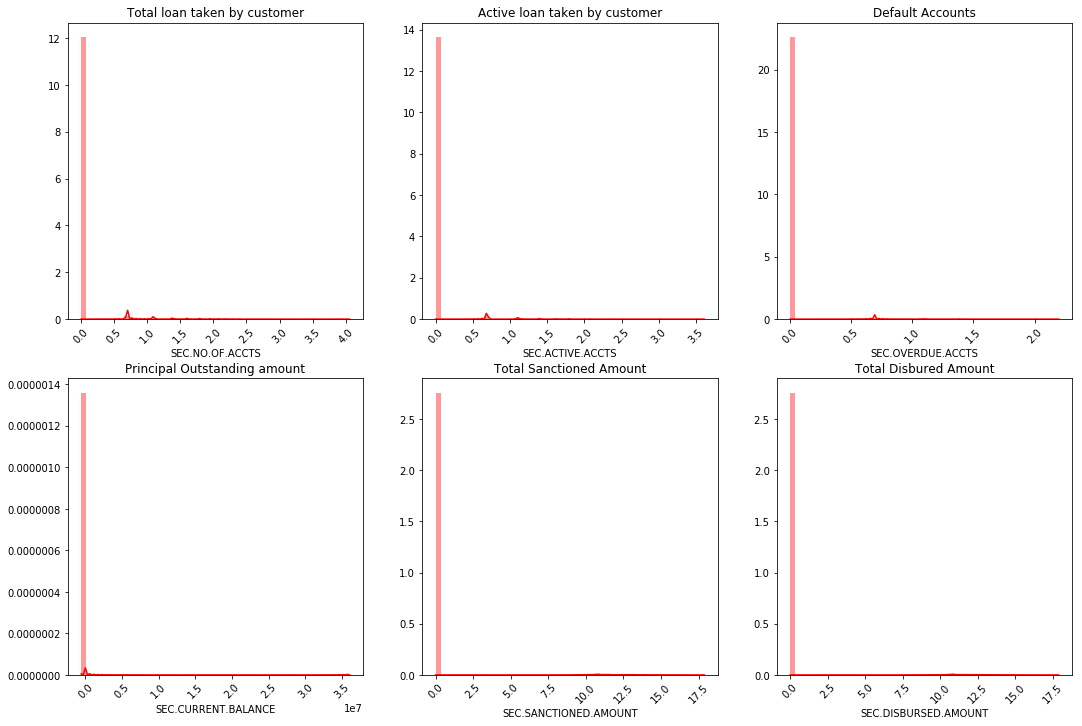

In [36]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'red')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'red')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'red')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'red')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'red')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

### Transforming primary account attributes

In [37]:
data['PRI.NO.OF.ACCTS'] = np.log1p(data['PRI.NO.OF.ACCTS'])
data['PRI.ACTIVE.ACCTS'] = np.log1p(data['PRI.ACTIVE.ACCTS'])
data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
#data['PRI.CURRENT.BALANCE'] = np.log1p(data['PRI.CURRENT.BALANCE'])
#data['PRI.SANCTIONED.AMOUNT'] = np.log1p(data['PRI.SANCTIONED.AMOUNT'])
data['PRI.DISBURSED.AMOUNT'] = np.log1p(data['PRI.DISBURSED.AMOUNT'])


#  filling  missing values in sec.current.balance
data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True)
data['PRI.SANCTIONED.AMOUNT'].fillna(data['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)

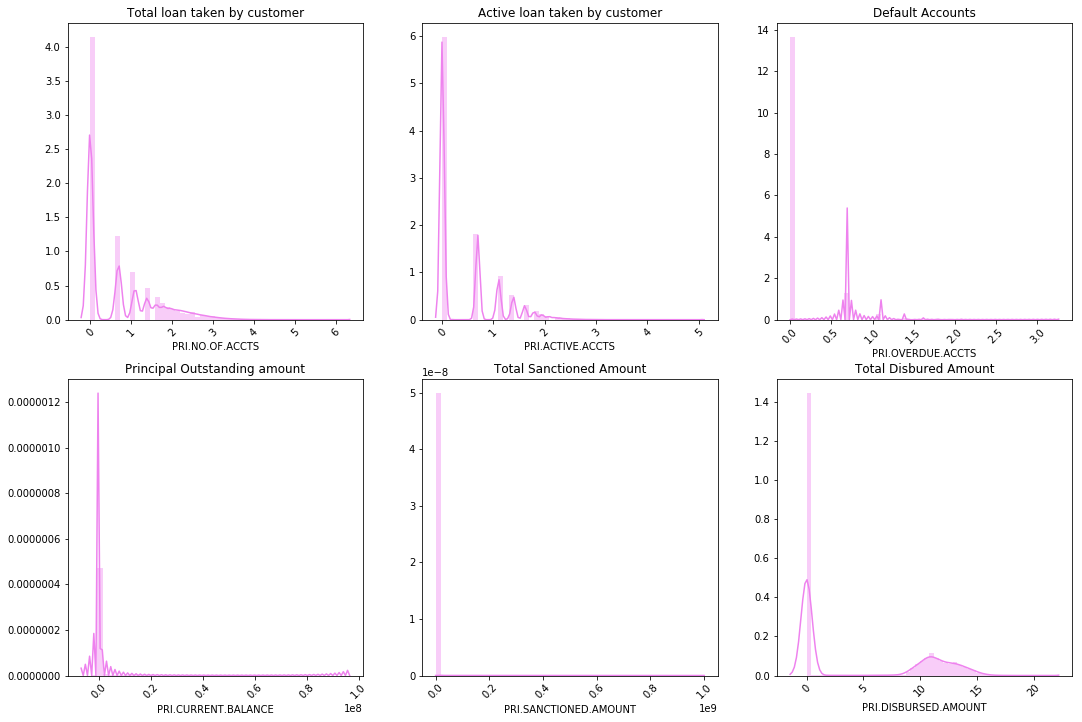

In [38]:
# plotting distribution plots for these attributes

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['PRI.NO.OF.ACCTS'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['PRI.ACTIVE.ACCTS'], color = 'violet')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['PRI.OVERDUE.ACCTS'], color = 'violet')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['PRI.CURRENT.BALANCE'], color = 'violet')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['PRI.SANCTIONED.AMOUNT'], color = 'violet')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['PRI.DISBURSED.AMOUNT'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

### Bureau Score Description

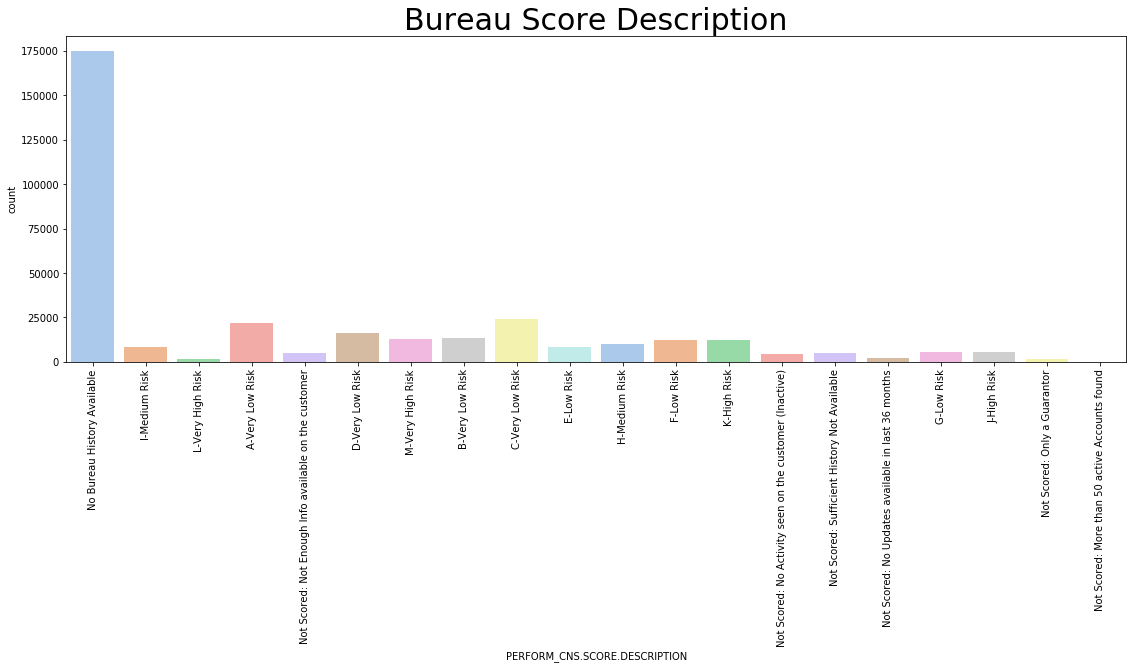

In [39]:
plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(data['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

### CNS Score Description

In [40]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

### Lets do some score encoding

In [41]:
# encodings for bureau score(perform cns score distribution)

data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

0    192802
5     75721
4     26364
3     18402
2     17667
1     14590
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

### CNS Score with and Without Transformation

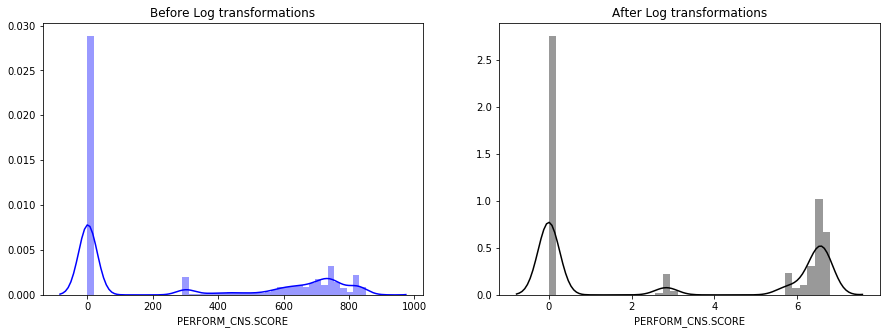

In [42]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'blue')
plt.title('Before Log transformations')

plt.subplot(1, 2, 2)
data['PERFORM_CNS.SCORE'] = np.log1p(data['PERFORM_CNS.SCORE'])
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'black')
plt.title('After Log transformations')

plt.show()

### Customers with Pasports

In [43]:

data['Passport_flag'].value_counts()

0    344835
1       711
Name: Passport_flag, dtype: int64

### Customers with Driving License

In [44]:
data['Driving_flag'].value_counts()

0    338249
1      7297
Name: Driving_flag, dtype: int64

### Customer is a registered voter or not

In [45]:
data['VoterID_flag'].value_counts()

0    298155
1     47391
Name: VoterID_flag, dtype: int64

### customer has pan card or not

In [46]:
data['PAN_flag'].value_counts()

0    306392
1     39154
Name: PAN_flag, dtype: int64

### customer has shared the mobile number or not

In [47]:
data['MobileNo_Avl_Flag'].value_counts()

1    345546
Name: MobileNo_Avl_Flag, dtype: int64

### Which Months has the Highest number of disbursments

In [48]:
data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
data['DisbursalMonth'] = data['DisbursalDate'].dt.month

data['DisbursalMonth'].value_counts()

11    99420
10    89440
8     58586
9     57939
12    10659
3      7601
6      7024
4      4627
7      4339
5      4178
1      1708
2        25
Name: DisbursalMonth, dtype: int64

### Plotting the months

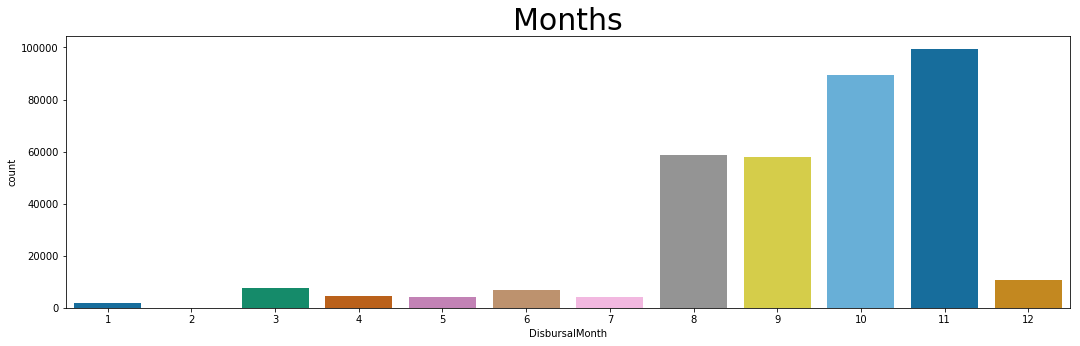

In [49]:

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['DisbursalMonth'], palette = 'colorblind')
plt.title('Months', fontsize = 30)
plt.show()

### Convering integers to types Category

In [50]:
# some attributes are categorical but they are in integer so let's convert them into category

data['branch_id'] = data['branch_id'].astype('category')
data['manufacturer_id'] = data['manufacturer_id'].astype('category')
data['State_ID'] = data['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['branch_id'] = le.fit_transform(data['branch_id'])
data['manufacturer_id'] = le.fit_transform(data['manufacturer_id'])
data['State_ID'] = le.fit_transform(data['State_ID'])

# checking the values in these attributes
#data['branch_id'].value_counts()
#data['manufacturer_id'].value_counts()
#data['State_ID'].value_counts()

### Lets drop the columns that we do not need

In [51]:
data = data.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID'], axis = 1)

# checking the new columns of data
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Year_of_birth',
       'DisbursalMonth'],
      dtype='object')

In [52]:
# looking at the sample of the pre-processed data

data.sample(5)


,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth,DisbursalMonth
105691,10.883767,11.071377,4.451436,3,5,1,8,1,0,0,...,0.0,0,0,0,0,0,0,0,1996,8
33935,11.133333,11.232523,4.553666,4,5,1,2,1,1,0,...,0.0,0,0,0,0,0,0,0,1977,3
213780,10.149566,10.852555,3.967836,36,0,1,3,1,1,0,...,0.0,0,0,0,0,0,0,0,1990,10
56289,10.919805,11.239817,4.312006,18,5,1,5,1,1,0,...,0.0,6799,0,1,0,0,0,1,1994,3
14759,10.673480,11.315705,4.017643,0,5,2,2,1,0,0,...,0.0,10815,0,1,2,1,3,0,1978,9


### separating train and test datasets from data by slicing

In [53]:
x_train = data.iloc[:233154,:]
x_test = data.iloc[233154:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 36)
Shape of test : (112392, 36)


### Performing SMOTE from  imblearn

In [54]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x_train, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 36)
Shape of y: (365086,)


In [55]:
# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(292068, 36)
(292068,)
(73018, 36)
(73018,)


### Standardization

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  


## RANDOM FOREST CLASSIFIER

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.987876111042634
Testing Accuarcy:  0.8159631871593306
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     36647
           1       0.88      0.73      0.80     36371

   micro avg       0.82      0.82      0.82     73018
   macro avg       0.83      0.82      0.81     73018
weighted avg       0.83      0.82      0.81     73018



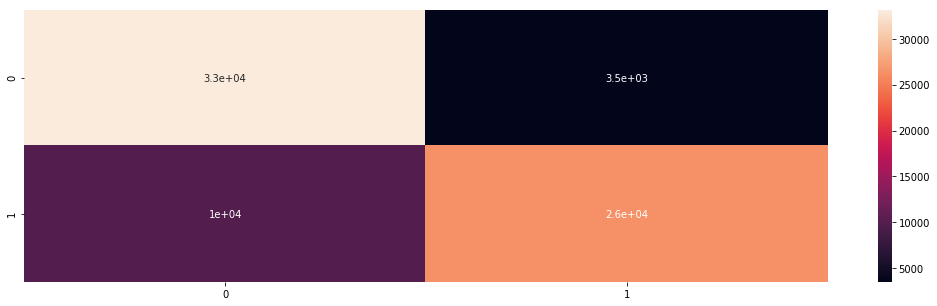

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

### Getting the avg precision score

In [58]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.7780458297510743


### Plotting the ROC curve

(0.0, 1.0)

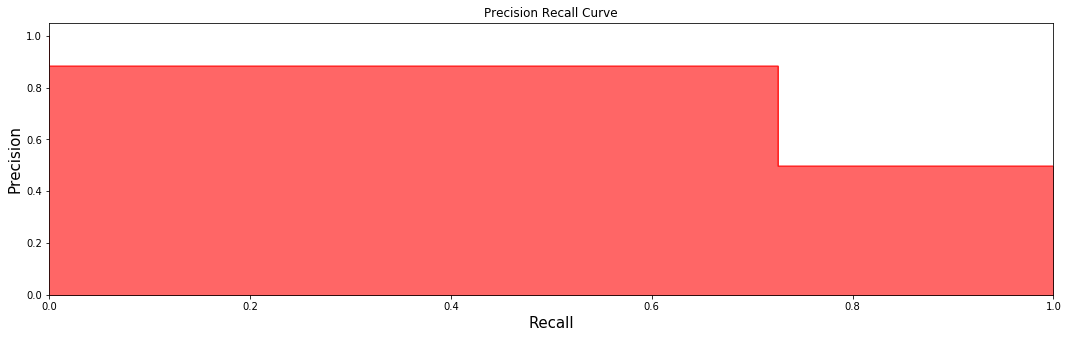

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'red', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'red', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

### ADA BOOST CLASSIFIER

Training Accuracy:  0.7439877014941726
Testing Accuarcy:  0.7412692760689145
              precision    recall  f1-score   support

           0       0.71      0.81      0.76     36647
           1       0.78      0.67      0.72     36371

   micro avg       0.74      0.74      0.74     73018
   macro avg       0.75      0.74      0.74     73018
weighted avg       0.75      0.74      0.74     73018



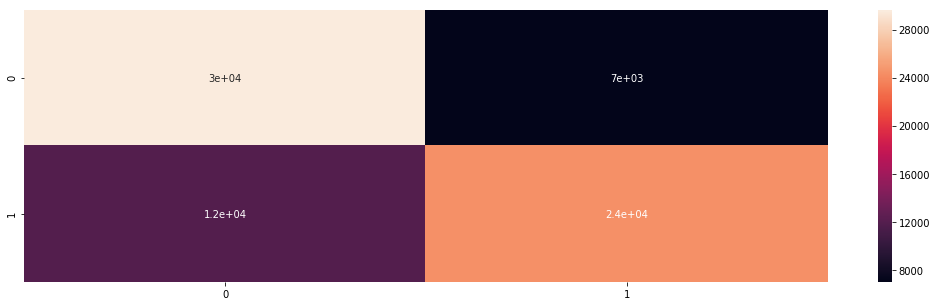

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(x_train, y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

### getting the avg precision score

In [61]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.6861865846967714


### plotting an AUC ROC Curve

(0.0, 1.0)

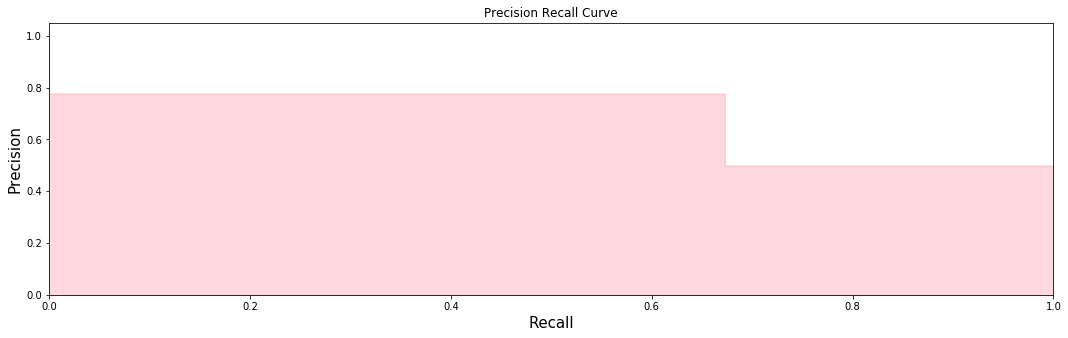

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

### Xg-Boost Classifier

Training Accuracy:  0.7925517345275758
Testing Accuarcy:  0.7899422060313895
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     36647
           1       0.88      0.67      0.76     36371

   micro avg       0.79      0.79      0.79     73018
   macro avg       0.81      0.79      0.79     73018
weighted avg       0.81      0.79      0.79     73018



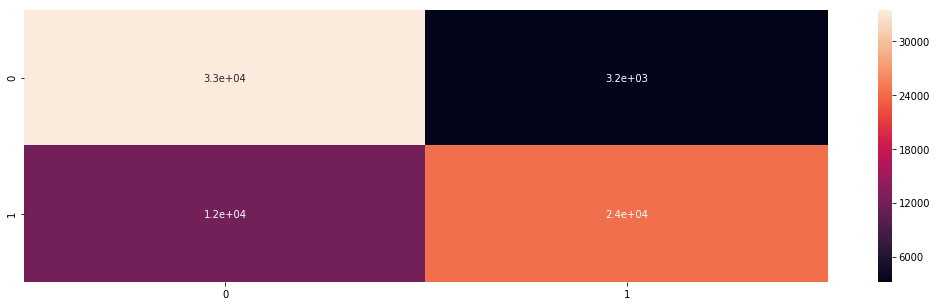

In [63]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

### getting the avg precision score

In [64]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.7546660062203345


### plotting an AUC ROC Curve

(0.0, 1.0)

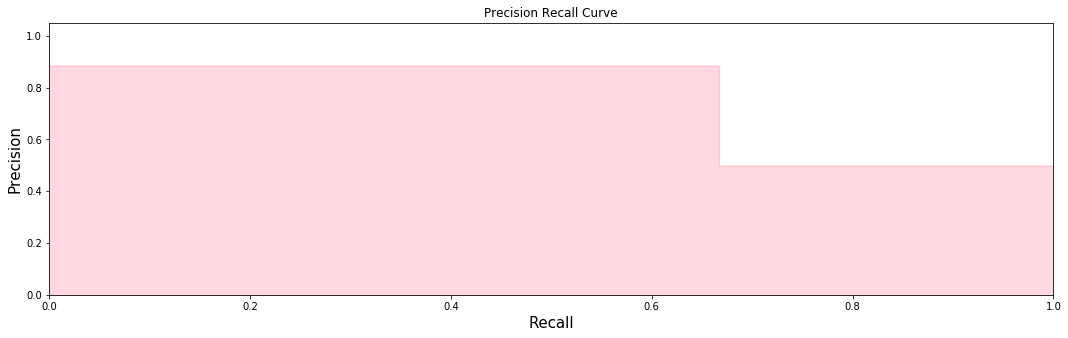

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

### Light boost classifier

Training Accuracy:  0.8315597737513182
Testing Accuarcy:  0.8282752198088142
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     36647
           1       0.94      0.70      0.80     36371

   micro avg       0.83      0.83      0.83     73018
   macro avg       0.85      0.83      0.83     73018
weighted avg       0.85      0.83      0.83     73018



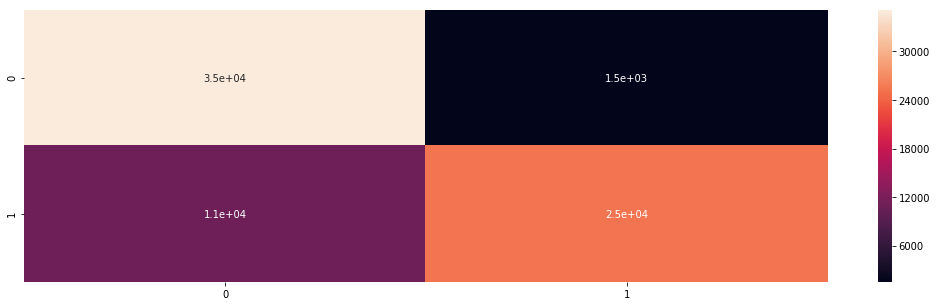

In [66]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lgb = LGBMClassifier()
model_lgb.fit(x_train, y_train)

y_pred = model_lgb.predict(x_valid)

print("Training Accuracy: ", model_lgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_lgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

### Getting the avg precision score

In [67]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.8083579923930194


### Plotting an AUC ROC Curve

(0.0, 1.0)

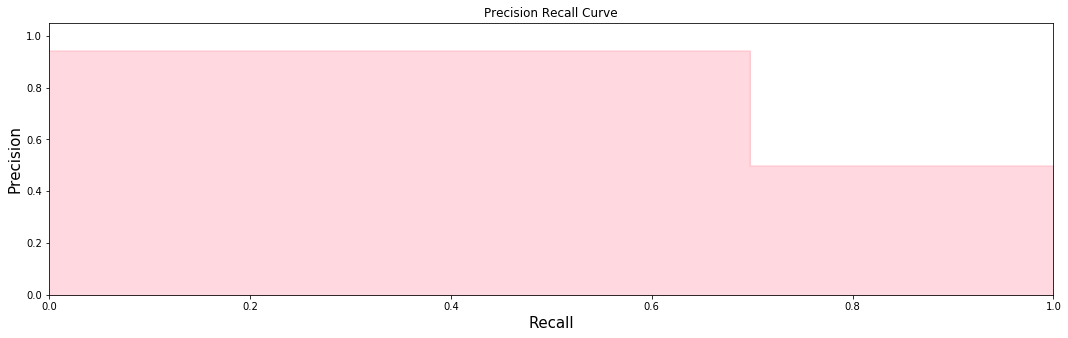

In [68]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

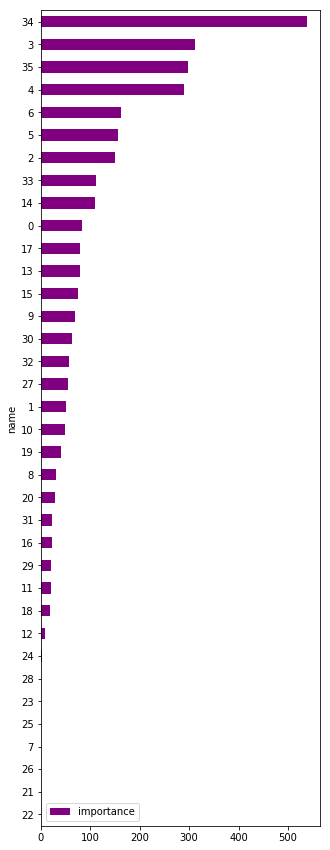

In [69]:
# let's plot the feature importance plot for the lg boost model

feature = pd.DataFrame()
x_train = pd.DataFrame(x_train)

feature['name'] = x_train.columns
feature['importance'] = model_lgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

### let's predict for the tests set

In [70]:
y_pred_rf = model_rf.predict(x_test)
y_pred_ada = model_ada.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)
y_pred_lgb = model_lgb.predict(x_test)

In [71]:
# Boosting
# as random forest and lgboost performed better than adaboost and xgboost
# so we prefer to give lgbbost and randomforest more importance

predictions = y_pred_rf*0.3 + y_pred_ada*0.2 + y_pred_xgb*0.2 + y_pred_xgb*0.3

In [72]:
# lets look at the submission file

submission = pd.read_csv('./static//sample_submission_24jSKY6.csv')

submission.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [73]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_lgb})

#Visualize the first 5 rows
submission.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [74]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv


### A total of 112K people have a potential of defaulting loans.